In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201, DenseNet169, DenseNet121, ResNet50, InceptionV3
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Define paths for dataset
DATASET_PATH = r"d:\OneDrive - University of Hertfordshire\UH SLTTC\Final Year Project\Dataset\aptos2019-blindness-detection\Train_images_new_2"
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

In [3]:
# Function to display images after each preprocessing step
def display_images(images, titles, ncols=5):
    fig, axes = plt.subplots(1, ncols, figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.set_title(titles[i])
        ax.axis("off")
    plt.show()

In [4]:
# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


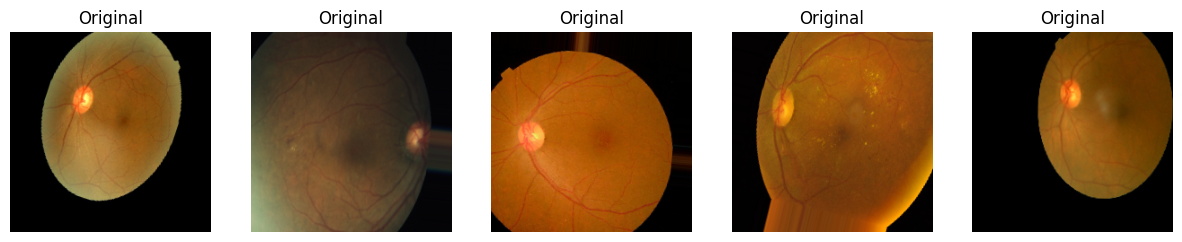

In [5]:
# Display sample images before and after augmentation
sample_images, _ = next(train_generator)
display_images(sample_images[:5], ["Original"] * 5)

In [6]:
# Define function to build model with different transfer learning architectures
def build_model(base_model):
    base_model.trainable = False  # Freeze base model
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(train_generator.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output_layer)
    return model

In [7]:
# Define transfer learning models
models = {
    "DenseNet201": DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "DenseNet169": DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "DenseNet121": DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "ResNet50": ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "InceptionV3": InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
}

Training DenseNet201...


c:\Users\arsha\anaconda3\envs\dr_detection\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 512s 5s/step - accuracy: 0.5021 - loss: 1.3650 - val_accuracy: 0.7059 - val_loss: 0.8375
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 460s 5s/step - accuracy: 0.6779 - loss: 0.9019 - val_accuracy: 0.7264 - val_loss: 0.7555
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 409s 4s/step - accuracy: 0.6872 - loss: 0.8209 - val_accuracy: 0.7305 - val_loss: 0.7283
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 473s 5s/step - accuracy: 0.7221 - loss: 0.7418 - val_accuracy: 0.7415 - val_loss: 0.7007
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 505s 5s/step - accuracy: 0.7306 - loss: 0.7215 - val_accuracy: 0.7497 - val_loss: 0.6664
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 474s 5s/step - accuracy: 0.7306 - loss: 0.7264 - val_accuracy: 0.7592 - val_loss: 0.6631
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 443s 5s/step - accuracy: 0.7657 - loss: 0.6524 - val_accuracy: 0.7661 - val_loss: 0.6305
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 434s 5s/step - accuracy: 0.7516 - loss: 0.6750 - val_accuracy: 0.7579 - v

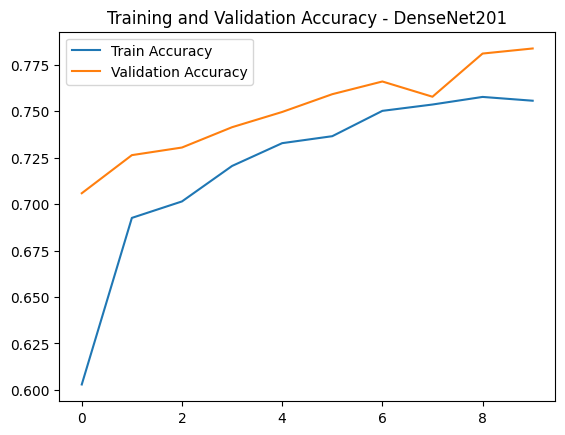

Training DenseNet169...
Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 345s 4s/step - accuracy: 0.4976 - loss: 1.4567 - val_accuracy: 0.7018 - val_loss: 0.8420
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 338s 4s/step - accuracy: 0.6601 - loss: 0.9459 - val_accuracy: 0.7319 - val_loss: 0.7473
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 355s 4s/step - accuracy: 0.6969 - loss: 0.8379 - val_accuracy: 0.7196 - val_loss: 0.7368
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 355s 4s/step - accuracy: 0.7322 - loss: 0.7480 - val_accuracy: 0.7469 - val_loss: 0.6808
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 339s 4s/step - accuracy: 0.7223 - loss: 0.7537 - val_accuracy: 0.7483 - val_loss: 0.6797
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 326s 4s/step - accuracy: 0.7386 - loss: 0.7063 - val_accuracy: 0.7688 - val_loss: 0.6384
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 325s 4s/step - accuracy: 0.7415 - loss: 0.6795 - val_accuracy: 0.7756 - val_loss: 0.6386
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.7522 - loss: 0.6759 - 

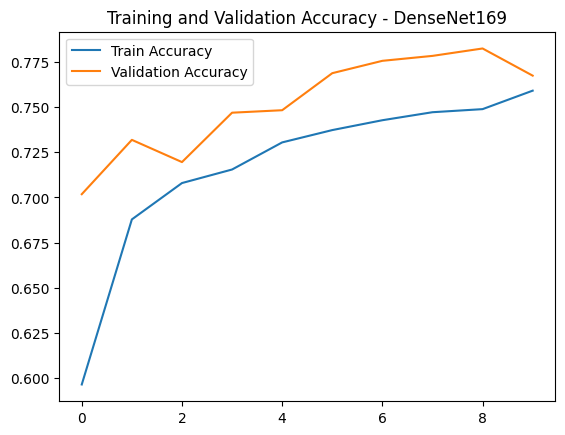

Training DenseNet121...
Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 329s 3s/step - accuracy: 0.4924 - loss: 1.4110 - val_accuracy: 0.7031 - val_loss: 0.8396
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 286s 3s/step - accuracy: 0.6556 - loss: 0.9454 - val_accuracy: 0.7237 - val_loss: 0.7713
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 280s 3s/step - accuracy: 0.6833 - loss: 0.8700 - val_accuracy: 0.7209 - val_loss: 0.7465
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.7143 - loss: 0.7902 - val_accuracy: 0.7291 - val_loss: 0.7187
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 294s 3s/step - accuracy: 0.7042 - loss: 0.8252 - val_accuracy: 0.7565 - val_loss: 0.6884
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 296s 3s/step - accuracy: 0.7146 - loss: 0.7579 - val_accuracy: 0.7524 - val_loss: 0.6680
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 296s 3s/step - accuracy: 0.7351 - loss: 0.7212 - val_accuracy: 0.7592 - val_loss: 0.6848
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 293s 3s/step - accuracy: 0.7340 - loss: 0.7350 - 

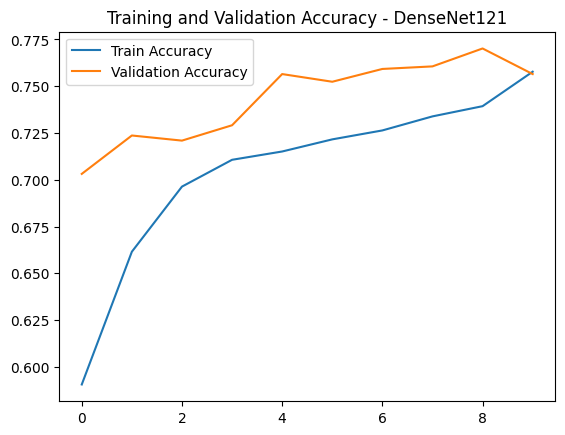

Training ResNet50...
Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 281s 3s/step - accuracy: 0.3882 - loss: 1.5828 - val_accuracy: 0.4938 - val_loss: 1.2944
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 276s 3s/step - accuracy: 0.4414 - loss: 1.4183 - val_accuracy: 0.4938 - val_loss: 1.2898
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - accuracy: 0.4722 - loss: 1.3463 - val_accuracy: 0.4938 - val_loss: 1.2850
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 256s 3s/step - accuracy: 0.4629 - loss: 1.3285 - val_accuracy: 0.4938 - val_loss: 1.2877
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 256s 3s/step - accuracy: 0.4689 - loss: 1.3012 - val_accuracy: 0.4938 - val_loss: 1.2819
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.4955 - loss: 1.3065 - val_accuracy: 0.4938 - val_loss: 1.2844
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - accuracy: 0.4942 - loss: 1.2876 - val_accuracy: 0.4938 - val_loss: 1.2805
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.4778 - loss: 1.3145 - val

c:\Users\arsha\anaconda3\envs\dr_detection\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arsha\anaconda3\envs\dr_detection\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arsha\anaconda3\envs\dr_detection\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

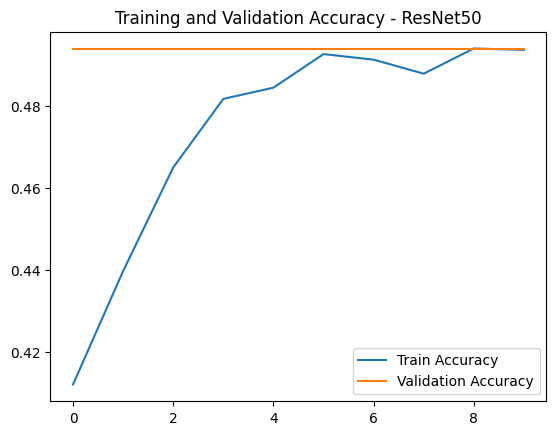

Training InceptionV3...
Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.5154 - loss: 1.4489 - val_accuracy: 0.6854 - val_loss: 0.8859
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.6564 - loss: 0.9607 - val_accuracy: 0.7141 - val_loss: 0.7993
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.6985 - loss: 0.8807 - val_accuracy: 0.7168 - val_loss: 0.7717
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.7166 - loss: 0.7988 - val_accuracy: 0.7209 - val_loss: 0.7640
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.6980 - loss: 0.8172 - val_accuracy: 0.7127 - val_loss: 0.7537
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.7215 - loss: 0.7851 - val_accuracy: 0.7387 - val_loss: 0.7263
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.7443 - loss: 0.7441 - val_accuracy: 0.7264 - val_loss: 0.7048
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.7108 - loss: 0.7591 - 

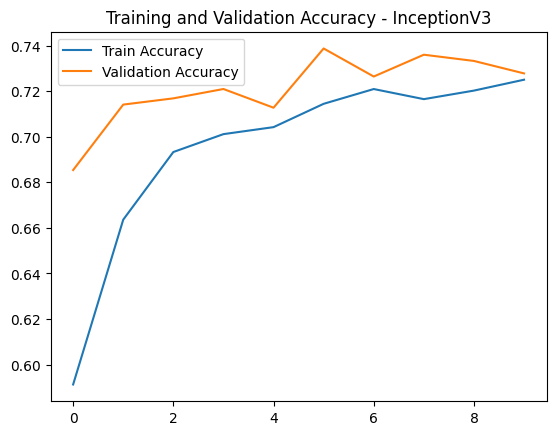

Training complete.


In [8]:
# Train and evaluate each model
results = {}
for name, base_model in models.items():
    print(f"Training {name}...")
    model = build_model(base_model)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(train_generator, epochs=10, validation_data=validation_generator)
    results[name] = history

    # Evaluate model
    y_true = validation_generator.classes
    y_pred = model.predict(validation_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(f"Classification Report for {name}:")
    print(classification_report(y_true, y_pred_classes))
    conf_matrix = confusion_matrix(y_true, y_pred_classes)
    print(f"Confusion Matrix for {name}:")
    print(conf_matrix)

    # Plot training history
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title(f"Training and Validation Accuracy - {name}")
    plt.show()

print("Training complete.")